# Predicting Kyphosis using Decision Tree and Random Forest

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

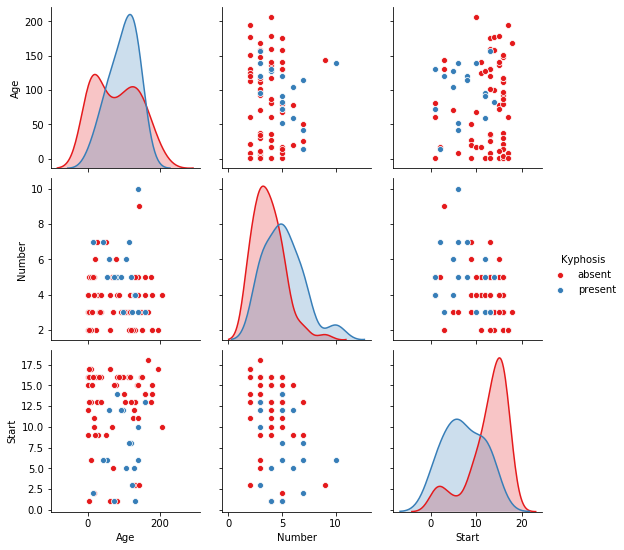

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.80      0.82        20
     present       0.33      0.40      0.36         5

    accuracy                           0.72        25
   macro avg       0.59      0.60      0.59        25
weighted avg       0.74      0.72      0.73        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[16  4]
 [ 3  2]]


## Tree Visualization

In [40]:
df.columns[1:]

Index(['Age', 'Number', 'Start'], dtype='object')

In [42]:
from sklearn.tree import plot_tree

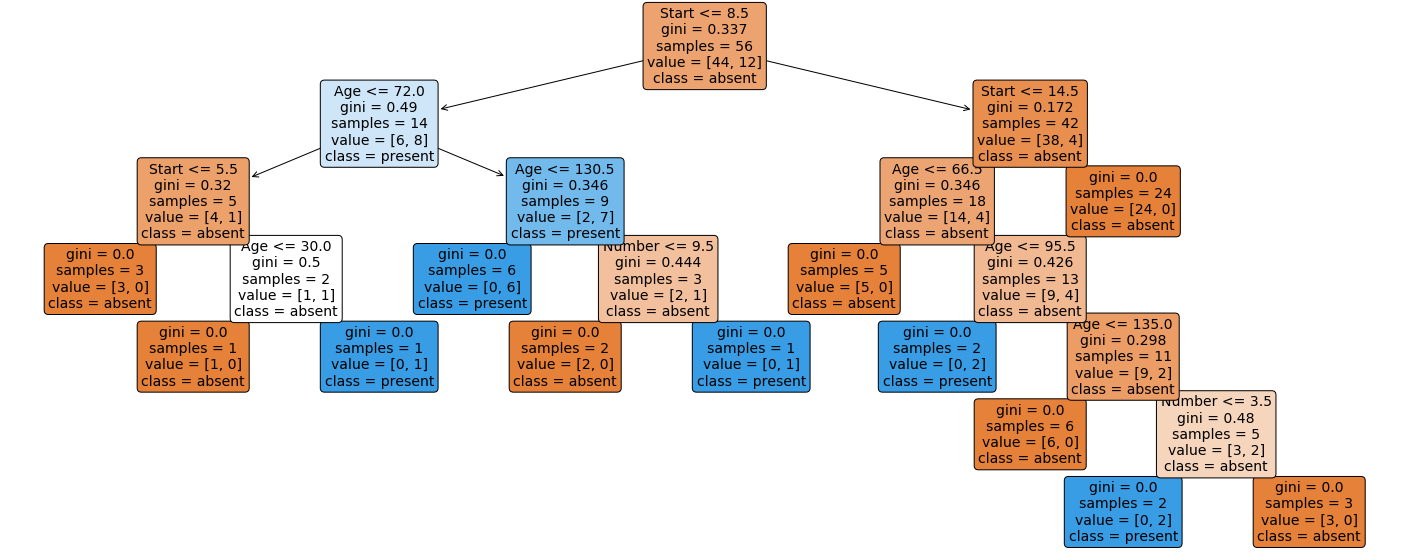

In [45]:
plt.figure(figsize=(25,10))

a = plot_tree(dtree, 

              feature_names=list(df.columns[1:]), 

              class_names=dtree.classes_, 

              filled=True, 

              rounded=True, 

              fontsize=14)

## Random Forests

Now let's compare the decision tree model to a random forest.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rfc_pred = rfc.predict(X_test)

In [48]:
print(confusion_matrix(y_test,rfc_pred))

[[19  1]
 [ 4  1]]


In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



###### Random forest MAY not outperform decision tree in small datasets but in bigger data sets, RFC performs better